In [195]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib
import seaborn as sns


In [196]:
df = pd.read_csv('../data/solarpowergeneration.csv')

In [183]:

target = 'power-generated'
features = [col for col in df.columns if col != target]

X = df[features]
y = df[target]


In [184]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [185]:

model = xgb.XGBRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    random_state=42
)

model.fit(X_train, y_train)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [186]:

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [187]:

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MAE: 1482.76
RMSE: 3318.07


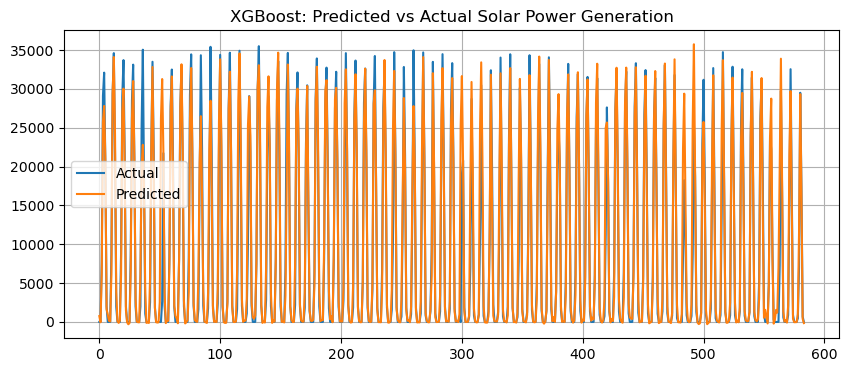

In [188]:

plt.figure(figsize=(10, 4))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("XGBoost: Predicted vs Actual Solar Power Generation")
plt.grid(True)
plt.show()


In [189]:

residuals = y_test.values - y_pred

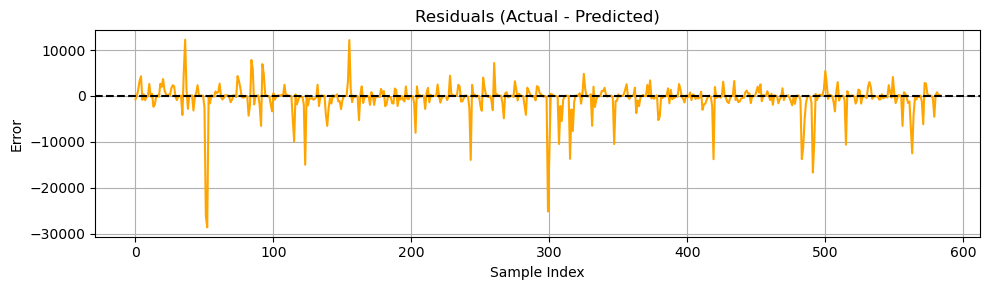

In [190]:
plt.figure(figsize=(10, 3))
plt.plot(residuals, color='orange')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals (Actual - Predicted)")
plt.xlabel("Sample Index")
plt.ylabel("Error")
plt.grid(True)
plt.tight_layout()
plt.show()

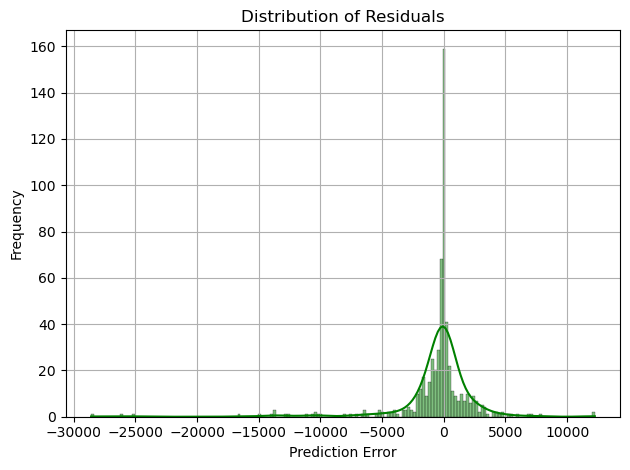

In [191]:
sns.histplot(residuals, kde=True, color='green')
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

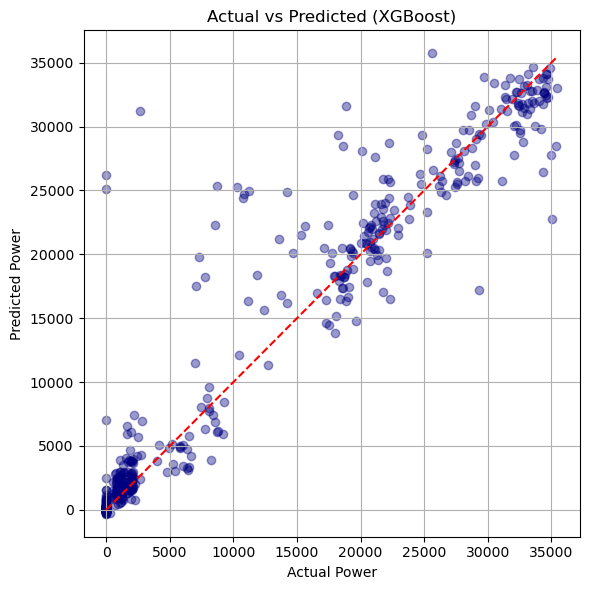

In [192]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.4, color='navy')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted (XGBoost)")
plt.xlabel("Actual Power")
plt.ylabel("Predicted Power")
plt.grid(True)
plt.tight_layout()
plt.show()

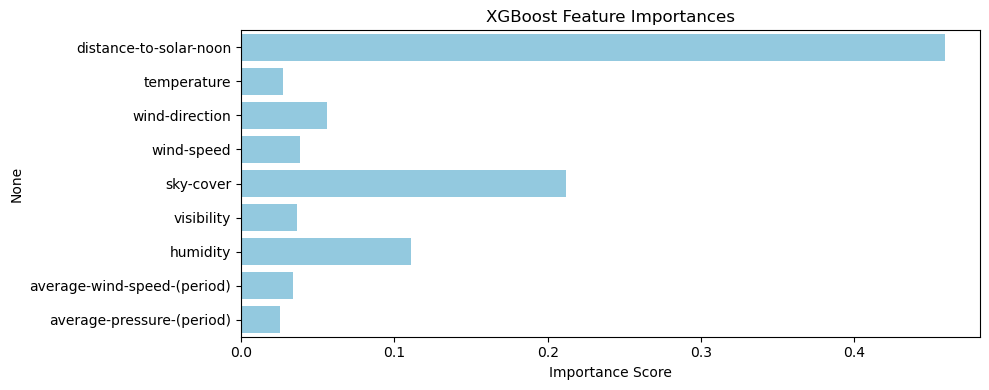

In [193]:

importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 4))
sns.barplot(x=importances, y=feature_names, color='skyblue')
plt.title("XGBoost Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [194]:


r2 = r2_score(y_test, y_pred)

print("🔍 Model Performance Summary")
print(f"📈 MAE  (Mean Absolute Error): {mae:.2f}")
print(f"📉 RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"🎯 R² Score: {r2:.4f}")
print(f"✅ Accuracy-like Score: {r2 * 100:.2f}%")


🔍 Model Performance Summary
📈 MAE  (Mean Absolute Error): 1482.76
📉 RMSE (Root Mean Squared Error): 3318.07
🎯 R² Score: 0.9257
✅ Accuracy-like Score: 92.57%
